In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data visualization

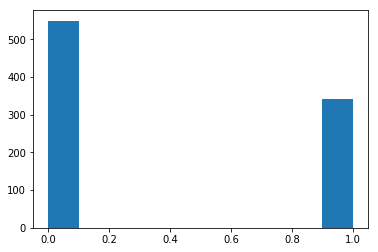

In [5]:
plt.hist(df["Survived"].values)
plt.show()

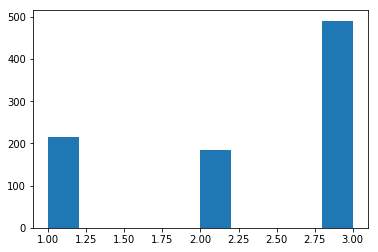

In [6]:
plt.hist(df["Pclass"].values)
plt.show()

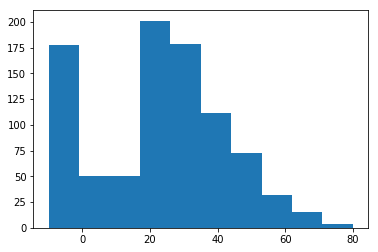

In [7]:
age=df["Age"].values
age[np.isnan(age)]=-10
plt.hist(age,bins=10)
plt.show()

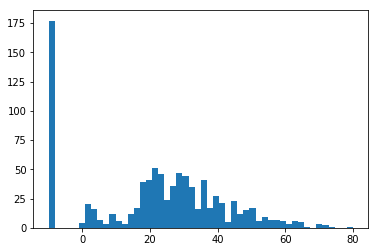

In [8]:
age=df["Age"].values
age=age[~np.isnan(age)]
plt.hist(age,bins=50)
plt.show()

In [9]:
names=df.columns.values

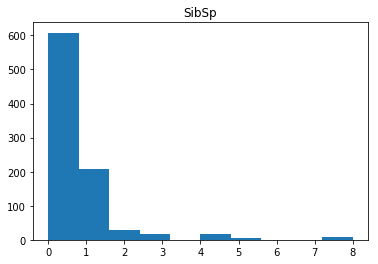

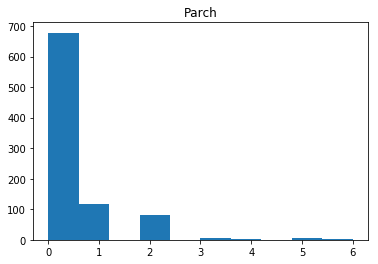

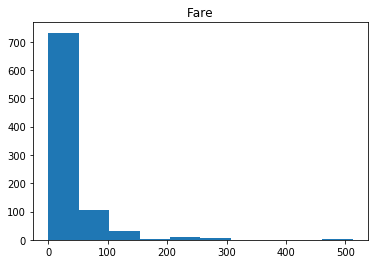

In [10]:
for i in [ 'SibSp','Parch',  'Fare',]:
    plt.hist(df[i].values)
    plt.title(i)
    plt.show()

# Due to most of those variable is categorical data, first thing change some variable into number.

In [11]:
names

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
data=pd.get_dummies(df, columns=["Sex", "Embarked"],)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [15]:
data.fillna(-1,inplace=True)

In [16]:
X=data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C','Embarked_Q', 'Embarked_S']]
y=data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
print(clf.feature_importances_)

[ 0.1154817   0.2005739   0.0667075   0.04743294  0.21998967  0.09321113
  0.2115267   0.01947038  0.00666635  0.01893973]


In [19]:
y_pred=clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[154,  21],
       [ 36,  84]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["S","D"]))

             precision    recall  f1-score   support

          S       0.81      0.88      0.84       175
          D       0.80      0.70      0.75       120

avg / total       0.81      0.81      0.80       295



In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["S","D"]))

             precision    recall  f1-score   support

          S       0.84      0.81      0.82       175
          D       0.74      0.77      0.75       120

avg / total       0.79      0.79      0.79       295



In [25]:
clf_pf = GaussianNB()
clf_pf.partial_fit(X_train, y_train,np.unique(y_train))
y_pred=clf_pf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["S","D"]))

             precision    recall  f1-score   support

          S       0.84      0.81      0.82       175
          D       0.74      0.77      0.75       120

avg / total       0.79      0.79      0.79       295

